In [217]:
import pandas as pd
import matplotlib.pyplot as plt

In [218]:
df = pd.read_csv('Songs_Emotions_Dataset_1.csv')

In [219]:
df.head()

,Names,Links,Emotion,Genre,BPM
0,Uptown Funk,https://www.youtube.com/watch?v=OPf0YbXqDm0,Happy,4.0,115
1,Party Rock Anthem,https://www.youtube.com/watch?v=KQ6zr6kCPj8,Happy,5.0,130
2,Shape of You,https://www.youtube.com/watch?v=JGwWNGJdvx8,Happy,4.5,96
3,Closer,https://www.youtube.com/watch?v=0zGcUoRlhmw,Love,4.1,95
4,Girl Like You,https://www.youtube.com/watch?v=aJOTlE1K90k,Mood,3.4,125


In [220]:
# Make a graph mapping genre to bpm with emotion labels
# input a genre and bpm and use knn to find the emotion (with a probability)

In [221]:
# Turn the df to a list
dflist = df.values.tolist()
# remove the links 
for song in dflist:
    song.pop(0)
    song.pop(0)

# dflist now maps emotion to genre (intensity) and bpm
print(dflist[:5])

[['Happy', 4.0, 115], ['Happy', 5.0, 130], ['Happy', 4.5, 96], ['Love', 4.1, 95], ['Mood', 3.4, 125]]


In [222]:
# plotdatalist[[emotion], [genre], [bpm]]
plotdatalist = [[], [], []]

for song in dflist:
    plotdatalist[0].append(song[0])
    plotdatalist[1].append(song[1])
    plotdatalist[2].append(song[2])

# multiply all genres x10 so its ints
newgenrelist = []
for genre in plotdatalist[1]:
    newgenrelist.append(int(genre*10))
plotdatalist[1] = newgenrelist

print(plotdatalist)


[['Happy', 'Happy', 'Happy', 'Love', 'Mood', 'Mood', 'Happy', 'Sad', 'Happy', 'Sad', 'Mood', 'Happy', 'Happy', 'Happy', 'Love', 'Angry', 'Happy', 'Mood', 'Mood', 'Happy', 'Happy', 'Love', 'Mood', 'Happy', 'Sad', 'Mood', 'Happy', 'Angry', 'Sad', 'Happy', 'Happy', 'Love', 'Sad', 'Happy', 'Mood', 'Angry', 'Happy', 'Sad', 'Happy', 'Happy', 'Sad', 'Mood', 'Happy', 'Happy', 'Happy', 'Angry', 'Love', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Sad', 'Happy', 'Sad', 'Mood', 'Happy', 'Mood', 'Sad', 'Mood', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Sad', 'Sad', 'Mood', 'Sad', 'Happy', 'Sad', 'Happy', 'Happy', 'Mood', 'Happy', 'Sad', 'Sad', 'Mood', 'Angry', 'Sad', 'Happy', 'Happy', 'Mood', 'Angry', 'Mood', 'Sad', 'Happy', 'Happy', 'Happy', 'Mood', 'Mood', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Mood', 'Sad'], [40, 50, 45, 41, 34, 50, 20, 36, 40, 10, 40, 70, 40, 70, 23, 60, 45, 32, 60, 70, 46, 37, 70, 40, 25, 35, 45, 50, 22, 35, 55, 18, 43, 42, 28, 64, 46, 15, 52, 46, 10, 25,

In [223]:
# genre on the x axis
# bpm on the y axis
# colours for emotions : (happy, yellow), (angry, red), (sad, blue), (mood, black)

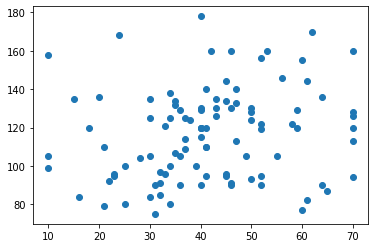

In [224]:
genrelist = plotdatalist[1]
bpmlist = plotdatalist[2]

plt.plot(genrelist, bpmlist, 'o')

In [225]:
songsdict = {}
for i in range(len(plotdatalist[0])):
    # bpm, genre
    songsdict[(plotdatalist[2][i], plotdatalist[1][i])] = plotdatalist[0][i]

print(songsdict)



{(115, 40): 'Happy', (130, 50): 'Happy', (96, 45): 'Happy', (95, 41): 'Love', (125, 34): 'Mood', (128, 50): 'Mood', (136, 20): 'Happy', (129, 36): 'Sad', (178, 40): 'Happy', (105, 10): 'Sad', (90, 40): 'Mood', (113, 70): 'Happy', (120, 40): 'Happy', (120, 70): 'Happy', (95, 23): 'Love', (155, 60): 'Angry', (134, 45): 'Happy', (85, 32): 'Mood', (77, 60): 'Mood', (128, 70): 'Happy', (160, 46): 'Happy', (109, 37): 'Love', (160, 70): 'Mood', (80, 25): 'Sad', (132, 35): 'Mood', (95, 45): 'Happy', (93, 50): 'Angry', (92, 22): 'Sad', (134, 35): 'Happy', (105, 55): 'Happy', (120, 18): 'Love', (126, 43): 'Sad', (160, 42): 'Happy', (104, 28): 'Mood', (136, 64): 'Angry', (130, 46): 'Happy', (135, 15): 'Sad', (122, 52): 'Happy', (91, 46): 'Happy', (99, 10): 'Sad', (100, 25): 'Mood', (124, 38): 'Happy', (129, 59): 'Happy', (144, 61): 'Happy', (87, 65): 'Angry', (79, 21): 'Love', (100, 34): 'Happy', (125, 37): 'Happy', (114, 37): 'Happy', (84, 30): 'Sad', (158, 10): 'Sad', (105, 36): 'Happy', (110, 

In [226]:
# look at points 0.7 genre to left and right
# look at 20 bpm up and down

In [227]:
targetbpm = int(input("Enter the BPM of the song: "))
print('Genres: Classical, Country, Pop, HipHop, Electronic, Rap, Rock (in inreasing intensities)')
genres = {'Classical', 'Country', 'Pop', 'HipHop', 'Electronic', 'Rap', 'Rock'}

targetgenrestring = ''
while targetgenrestring not in genres:
    targetgenrestring = str(input("Enter the Genre of the song: "))

Genres: Classical, Country, Pop, HipHop, Electronic, Rap, Rock (in inreasing intensities)


In [228]:
genresdict = {
    'Classical': 1, 
    'Country': 2, 
    'Pop': 3, 
    'HipHop': 4, 
    'Electronic': 5, 
    'Rap': 6, 
    'Rock': 7
}
targetgenreint = genresdict[targetgenrestring]
targetgenreint = targetgenreint*10

print('bpm: ', targetbpm)
print('genre: ', targetgenreint)

bpm:  95
genre:  30


In [229]:
closeemotionslist = []
for bpm in range(targetbpm-20, targetbpm+20):
    for genre in range(targetgenreint-7, targetgenreint+7):
        if (bpm, genre) in songsdict:
            closeemotionslist.append(songsdict[(bpm, genre)])

print(closeemotionslist)

['Sad', 'Sad', 'Sad', 'Sad', 'Mood', 'Happy', 'Happy', 'Happy', 'Love', 'Sad', 'Happy', 'Happy', 'Mood', 'Happy', 'Mood', 'Mood', 'Happy', 'Mood']


In [230]:
happycount = closeemotionslist.count('Happy')/len(closeemotionslist)
sadcount = closeemotionslist.count('Sad')/len(closeemotionslist)
moodcount = closeemotionslist.count('Mood')/len(closeemotionslist)
angrycount = closeemotionslist.count('Angry')/len(closeemotionslist)
lovecount = closeemotionslist.count('Love')/len(closeemotionslist)

print('Happy: ', happycount)
print('Sad', sadcount)
print('Mood', moodcount)
print('Angry', angrycount)
print('Love', lovecount)

Happy:  0.3888888888888889
Sad 0.2777777777777778
Mood 0.2777777777777778
Angry 0.0
Love 0.05555555555555555
